# Car Controller #

This notebook contains various exercises related to controlling a car.

### Exercise: Simple reflex agent ###

Below is a simple simulation of driving. Your task is to create a car control program that takes the current velocity as a precept and uses it to determine how much to press the pedal (activation levels ranging from 0 to 1) in order to get the car to drive at a particular speed. Some things you may want to try:

- A proportional controller: A controller that generates a process variable value (in this case, the pedal activation) based on finding the error (difference) between the current value and the desired value and multiplying it by a constant. (Experiment with various coefficients. Check whether the velocity of the car converges to a value. Is it the desired value?)

- Any other control program of your design.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.01428571 0.02857121 0.04285607 0.05713986 0.07142214 0.0857025
 0.0999805  0.11425572 0.12852773 0.1427961  0.1570604  0.17132022
 0.18557511 0.19982467 0.21406845 0.22830605 0.24253704 0.25676098
 0.27097748 0.28518609 0.29938641 0.31357801 0.32776047 0.34193339
 0.35609634 0.37024891 0.38439068 0.39852126 0.41264021 0.42674714
 0.44084163 0.45492329 0.4689917  0.48304646 0.49708718 0.51111344
 0.52512486 0.53912103 0.55310156 0.56706605 0.58101413 0.59494538
 0.60885944 0.62275591 0.63663441 0.65049455 0.66433597 0.67815827
 0.69196109 0.70574406 0.71950679 0.73324893 0.74697011 0.76066996
 0.77434813 0.78800425 0.80163796 0.81524892 0.82883677 0.84240117]


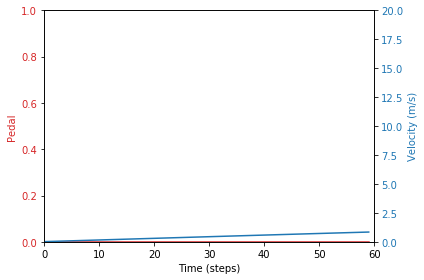

In [2]:
from agents import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

class SimpleDrivingEnv(Environment):
    vel_steps = np.array([])
    pedal_steps = np.array([])
    num_steps = 0
    
    def percept(self, agent):
        '''return information from sensors'''
        return agent.velocity # Detected from car's odometer / speed sensors
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        u = action["pedal"]
        
        # Calculate how the pedal changes the velocity of the car.
        # Basic physics simulation taken from here:
        # https://www.youtube.com/watch?v=k46nCvOBllA [APMonitor.com]
        # Clip inputs
        if (u >= 1.0):
            u = 1.0
        if (u < 0.0):
            u = 0.0
        
        Cd = 0.24           # drag coefficient
        rho = 1.225         # air density (kg/m^3)
        A = 5.0             # cross-sectional area (m^2)
        Fp = 3000           # thrust parameter (N) - this gets scaled by pedal value
        m = agent.mass      # vehicle mass
        v = agent.velocity  # current velocity
        # Calculate derivative of velocity:
        dv_dt = (1.0/m) * (10 + (Fp*u) - 0.5*rho*Cd*A*v*v)
        agent.velocity = agent.velocity + dv_dt
        
        agent.x = agent.x + agent.velocity
        
        
    def step(self):
        """Run the environment for one time step. If the
        actions and exogenous changes are independent, this method will
        do. If there are interactions between them, you'll need to
        override this method."""
        if not self.is_done():
            actions = []
            for agent in self.agents:
                if agent.alive:
                    actions.append(agent.program(self.percept(agent)))
                else:
                    actions.append("")
            for (agent, action) in zip(self.agents, actions):
                self.execute_action(agent, action)
                self.pedal_steps = np.append(self.pedal_steps, [action["pedal"]])
                self.vel_steps = np.append(self.vel_steps, [agent.velocity])
            self.exogenous_change()
            
        
    def run(self, steps=1000):
        """Run the Environment for given number of time steps, then display a graph
        of what happened."""
        self.num_steps = steps
        for step in range(steps):
            if self.is_done():
                break
            self.step()
        print(self.pedal_steps)
        print(self.vel_steps)
        self.draw_world()
    
    
    def draw_world(self):
        '''Draws a graph displaying pedal setting and velocity at all timesteps'''
        t = np.arange(0, self.num_steps)
        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Time (steps)')
        ax1.set_ylabel('Pedal', color=color)
        ax1.plot(t, self.pedal_steps, color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_xlim(0, self.num_steps)
        ax1.set_ylim(0, 1)

        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Velocity (m/s)', color=color)
        ax2.plot(t, self.vel_steps, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylim(0, 20)

        fig.tight_layout()
        plt.show()

    
    
class Car(Agent):
    # Class variables. Note that the AI program you write does not have access to these variables,
    # but the environment, which is simulating cars, does.
    #x = 0.0
    #velocity = 0.0
    #mass = 700.0
    
    def __init__(self, program = None, x = 0, velocity = 0, mass = 700, graph = True):
        super().__init__(program)
        self.x = x
        self.velocity = velocity
        self.mass = mass
        self.graph = graph
        

setpoint = 15.0 # setpoint = goal velocity (in m/s)
        
def program(percepts):
    '''Returns an action based on the car's percepts (current velocity, in this case) and task specification
    (setpoint). The action is how much to activate the pedal, from 0 to 1.'''
    # IMPLEMENT ME!
    return {"pedal": 0} # default: does nothing


env = SimpleDrivingEnv()
myCar = Car(program)
env.add_thing(myCar)

env.run(60)

### Exercise: Model-based reflex agent ###

In the previous exercise, we created a proportional controller. However, you may have noticed an issue: it doesn't actually ever reach the setpoint. The way to fix this is by detecting that there is a consistent error that doesn't seem to be dissipating, and using this information to adjust the process variable generated by your controller. This is a proportional-integral (PI) controller. In order to calculate this integral term, we need to keep track of previous errors, turning our agent into one that must keep some state (a very simple model of the world).

Use the below ModelBasedCar Agent to implement PI control.

In [ ]:
def ModelBasedCar():
    model = {"past_errors": []}
        
    def program(percepts):
        '''Returns an action based on the car's percepts (current velocity, in this case) and task specification
        (setpoint). The action is how much to activate the pedal, from 0 to 1.'''
        # Store past errors
        # IMPLEMENT ME!
        
        # Determine value of process variable
        # IMPLEMENT ME!
        return {"pedal": 0} # default: does nothing

    return Car(program)

setpoint = 15.0 # setpoint = goal velocity (in m/s)

env = SimpleDrivingEnv()
myCar = ModelBasedCar()
env.add_thing(myCar)

env.run(60)

### Exercise: Safe following distance ###

Using the techniques from above, create a control program that allows a car to follow another car from a safe distance. Assume that your car gets estimated distance to the car ahead as a precept (taken e.g. from a camera image).

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0.01428571 0.02857121 0.04285607 0.05713986 0.07142214 0.0857025
 0.0999805  0.11425572 0.12852773 0.1427961  0.1570604  0.17132022
 0.18557511 0.19982467 0.21406845 0.22830605 0.24253704 0.25676098
 0.27097748 0.28518609 0.29938641 0.31357801 0.32776047 0.34193339
 0.35609634 0.37024891 0.38439068 0.39852126 0.41264021 0.42674714
 0.44084163 0.45492329 0.4689917  0.48304646 0.49708718 

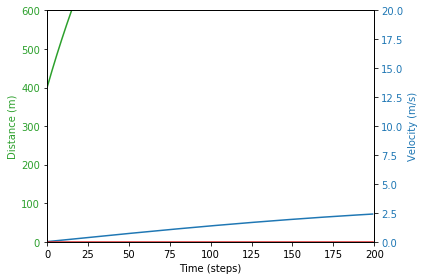

In [3]:
class TwoCarDrivingEnv(SimpleDrivingEnv):
    dist_steps = np.array([])
    
    def percept(self, agent):
        '''return information from sensors'''
        distance_from_car = 10000
        for a in self.agents:
            if (a != agent):
                xdiff = a.x - agent.x
                if (xdiff < distance_from_car):
                    distance_from_car = xdiff
                    
        if (agent.graph):
            self.dist_steps = np.append(self.dist_steps, [distance_from_car])
                    
        return agent.velocity, distance_from_car
    
    def step(self):
        """Run the environment for one time step. If the
        actions and exogenous changes are independent, this method will
        do. If there are interactions between them, you'll need to
        override this method."""
        if not self.is_done():
            actions = []
            for agent in self.agents:
                if agent.alive:
                    actions.append(agent.program(self.percept(agent)))
                else:
                    actions.append("")
            for (agent, action) in zip(self.agents, actions):
                self.execute_action(agent, action)
                if (agent.graph):
                    self.pedal_steps = np.append(self.pedal_steps, [action["pedal"]])
                    self.vel_steps = np.append(self.vel_steps, [agent.velocity])
            self.exogenous_change()
            
            
    def draw_world(self):
        '''Draws a graph displaying pedal setting and velocity at all timesteps'''
        t = np.arange(0, self.num_steps)
        fig, ax1 = plt.subplots()

        color = 'tab:green'
        ax1.set_xlabel('Time (steps)')
        ax1.set_ylabel('Distance (m)', color=color)
        ax1.plot(t, self.dist_steps, color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_xlim(0, self.num_steps)
        ax1.set_ylim(0, 600)

        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Velocity (m/s)', color=color)
        ax2.plot(t, self.vel_steps, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylim(0, 20)
        
        ax3 = ax1.twinx()
        color = 'tab:red'
        ax3.get_yaxis().set_visible(False)
        ax3.plot(t, self.pedal_steps, color=color)
        ax3.set_ylim(0, 1)

        fig.tight_layout()
        plt.show()
    

def OtherCar(x = 0, velocity = 0, mass = 700, graph = False):
    '''This other car (not in your control) accelerates halfway through the time period'''
    model = {"step": 0}
        
    def program(percepts):
        model["step"] += 1
        
        if (model["step"] >= 30 and model["step"] < 45):
            return {"pedal": .3}
        else:
            return {"pedal": .1}

    return Car(program, x, velocity, mass, graph)
        
def ModelBasedCar(x = 0, velocity = 0, mass = 700, graph = True):
    # Define model
    # IMPLEMENT ME! Put any state you want here.
    model = {"past_errors": []}
        
    def program(percepts):
        '''Returns an action based on the car's percepts (current velocity, distance to car ahead).
        The action is how much to activate the pedal, from 0 to 1. Objective: safe following distance,
        which we shall define as 4*(current velocity) meters'''
        velocity, distance = percepts
                    
        # Update model
        # IMPLEMENT ME!
        
        # Determine value of process variable
        # IMPLEMENT ME!
        return {"pedal": 0} # default: does nothing

    return Car(program, x, velocity, mass, graph)


env = TwoCarDrivingEnv()
otherCar = OtherCar(400, 15)
myCar = ModelBasedCar(0, 0)
env.add_thing(otherCar)
env.add_thing(myCar)

env.run(200)
                    

### Exercise: Adding braking ###

Alter the code above to allow braking to be implemented. This can either be done as a negative pedal activation or by creating two separate pedals: acceleration and braking.